In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
from scipy.special import gamma

from joblib import Parallel, delayed

import datetime

import glob

from matplotlib.cm import rainbow

In [5]:
def get_hurst_exponent(time_series, max_lag=100):

    lags = range(10, max_lag)

    #   For every X we calculate X minus X_SHIFTED_Q. Then we calculate STD.
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # log()
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

/Users/molozey/Desktop/algo/venv/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/molozey/Desktop/algo/venv/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/molozey/Desktop/algo/venv/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1806/1755413659.py:9: RuntimeWarning: divide by zero encountered in log
  reg = np.polyfit(np.log(lags), np.log(tau), 1)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

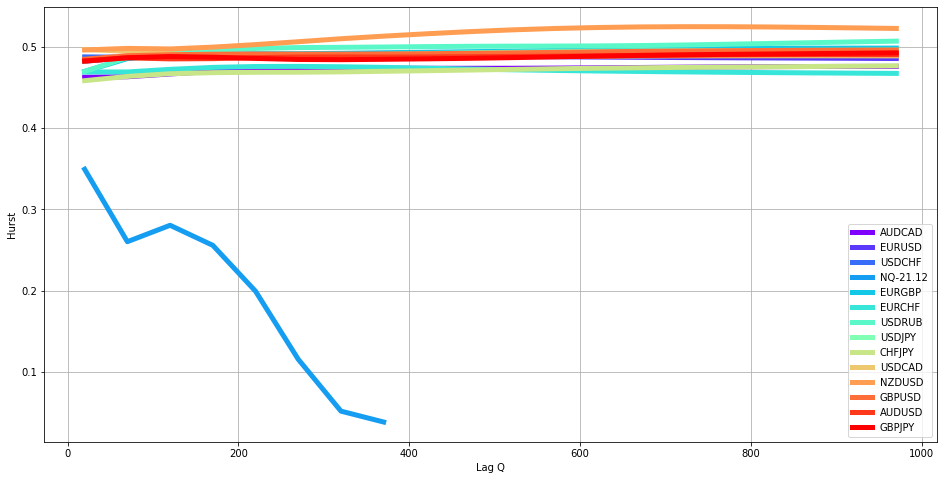

In [21]:
RESULTS_HURST = list()
files = glob.glob('zip_data/*.csv')[:]
colors = rainbow(np.linspace(0, 1, len(files)))
plt.figure(figsize=(16,8))
plt.grid()
plt.ylabel('Hurst')
plt.xlabel('Lag Q')

LAGS = np.arange(20, 100_0, 50)
for arrow, _ in tqdm(enumerate(files[:]), total=len(files)):
    RES = list()
    name = _.split('/')[1][:-4]
    if name != ('ES-21.12' or ' NQ-21.12'):
        data = pd.read_csv(_).dropna()
        for _ in tqdm(LAGS, leave=False):
            RES.append(get_hurst_exponent(data.close.values, max_lag=_))
        plt.plot(LAGS, RES, color=colors[arrow], linewidth=5, label=name)
        RESULTS_HURST.append([name, (LAGS, RES)])
plt.legend(loc='lower right')
plt.show()